In [14]:
import pandas as pd
import gseapy as gp

ModuleNotFoundError: No module named 'gseapy'

In [10]:
! pip install gseapy

  Using cached gseapy-1.1.2.tar.gz (106 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for gseapy (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [36 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.linux-x86_64-cpython-312
      creating build/lib.linux-x86_64-cpython-312/gseapy
      copying gseapy/biomart.py -> build/lib.linux-x86_64-cpython-312/gseapy
      copying gseapy/__init__.py -> build/lib.linux-x86_64-cpython-312/gseapy
      copying gseapy/msigdb.py -> build/lib.linux-x86_64-cpython-312/gseapy
      copying gseapy/enrichr.py -> build/lib.linux-x86_64-cpython-312/gseapy
      copying gseapy/gsea.py -> build/lib.linux-x86_64-cpython-312/gseapy
      copying gseapy/parser.py -> build/lib.linux-x86_64-cpython-312/gseapy
      co

In [3]:
gene_list = ['FERMT1', 'FERMT2', 'FERMT3']

In [2]:
import pandas as pd
import os
folder_path = '/home/nmrbox/0032/spriyadarshi/spriyadarshi/mRNA'

df_list = []
for file in os.listdir(folder_path):
    df = pd.read_csv(os.path.join(folder_path, file),sep='\t',header=(0))
    #df = df[df['Hugo_Symbol'].isin(gene_list)]
    df = df.set_index('Hugo_Symbol')
    df = df[df.index.notnull()]
    df = df[~df.index.duplicated(keep='first')]
    df = df.iloc[:,1:]
    df_list.append(df)

In [3]:
common_index = set(df_list[0].index)
for df in df_list[1:]:
    common_index = common_index.intersection(df.index)
common_index = list(common_index)

In [4]:
len(common_index)

20510

In [5]:
df_list1 = []
for df in df_list:
    df = df[df.index.isin(common_index)]
    df_list1.append(df)

In [30]:
df_list1[0]

,TCGA-4C-A93U-01,TCGA-BJ-A0YZ-01,TCGA-BJ-A0Z0-01,TCGA-BJ-A0Z2-01,TCGA-BJ-A0Z3-01,TCGA-BJ-A0Z5-01,TCGA-BJ-A0Z9-01,TCGA-BJ-A0ZA-01,TCGA-BJ-A0ZB-01,TCGA-BJ-A0ZC-01,...,TCGA-KS-A4ID-01,TCGA-L6-A4EP-01,TCGA-L6-A4EQ-01,TCGA-L6-A4ET-01,TCGA-L6-A4EU-01,TCGA-MK-A4N6-01,TCGA-MK-A4N7-01,TCGA-MK-A4N9-01,TCGA-MK-A84Z-01,TCGA-QD-A8IV-01
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
UBE2Q2P2,-3.6892,-1.5617,-1.0676,1.1388,-0.1618,0.0549,-0.1211,-1.7182,-0.1577,0.7808,...,0.1189,0.6642,-0.1894,-1.1548,-0.5476,0.3494,0.8140,1.8292,0.4185,0.5402
HMGB1P1,-0.0047,0.1338,0.8272,1.1391,0.6153,1.1514,0.2941,1.0395,1.0131,0.2376,...,-0.4342,0.7040,0.6540,0.4641,-0.1360,-0.3579,0.5818,0.0892,-0.0283,-0.1981
RNU12-2P,-0.6524,-0.8099,-0.8629,0.2867,-0.5613,-0.7832,-2.0041,0.5623,1.4994,-0.7592,...,1.8149,-2.0041,0.8582,-0.9089,-2.0041,-0.8913,-1.0943,-0.7805,0.4369,1.4530
SSX9P,-1.4791,-1.4791,-1.4791,-1.4791,-0.0653,0.1508,-0.1127,-1.4791,-0.2233,-0.7623,...,-1.4791,-1.4791,-0.7664,0.6106,-0.9746,-1.4791,-0.9552,0.1537,-1.4791,-1.4791
EZHIP,-1.0053,-1.8914,-0.1347,0.8436,-0.0115,0.3501,-1.8914,0.1547,-0.1343,-1.8914,...,0.6119,1.2811,-0.4852,-0.6302,-1.8914,-1.8914,-0.4350,1.2256,2.7102,0.8064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,-0.6843,0.3140,1.0698,0.6589,-0.7447,1.5431,0.9654,-1.2862,-0.5266,1.5799,...,0.4186,-0.6357,-0.3115,-1.4189,-0.0246,0.4181,-1.3220,-2.3470,1.1522,1.7310
ZYG11B,0.8509,-1.1667,1.4279,-0.4074,0.5096,0.7237,0.2764,-0.3640,1.8539,1.4249,...,-0.3311,-1.9357,-0.2436,-1.4902,-0.3194,2.3594,0.4716,-0.0958,-0.2266,0.2368
ZYX,0.7774,-0.5895,-2.0157,-2.7387,0.4821,-0.0582,1.1893,-0.8516,-0.0428,-1.7243,...,0.1654,1.0919,0.9847,0.8690,1.0426,0.8635,-0.0972,0.4933,-0.9511,-1.9099


In [6]:
expr_data = pd.concat(df_list1, axis=1)
expr_data

,TCGA-4C-A93U-01,TCGA-BJ-A0YZ-01,TCGA-BJ-A0Z0-01,TCGA-BJ-A0Z2-01,TCGA-BJ-A0Z3-01,TCGA-BJ-A0Z5-01,TCGA-BJ-A0Z9-01,TCGA-BJ-A0ZA-01,TCGA-BJ-A0ZB-01,TCGA-BJ-A0ZC-01,...,TCGA-61-2102-01,TCGA-61-2104-01,TCGA-61-2109-01,TCGA-61-2110-01,TCGA-61-2111-01,TCGA-61-2113-01,TCGA-OY-A56P-01,TCGA-OY-A56Q-01,TCGA-VG-A8LO-01,TCGA-WR-A838-01
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
UBE2Q2P2,-3.6892,-1.5617,-1.0676,1.1388,-0.1618,0.0549,-0.1211,-1.7182,-0.1577,0.7808,...,-2.8489,0.6277,1.2643,1.4364,-1.5617,-1.2132,0.4831,-0.3254,0.6116,1.7430
HMGB1P1,-0.0047,0.1338,0.8272,1.1391,0.6153,1.1514,0.2941,1.0395,1.0131,0.2376,...,0.7286,-0.3904,0.6166,-1.1693,0.2519,-0.8132,0.1315,0.9427,0.6312,1.0323
RNU12-2P,-0.6524,-0.8099,-0.8629,0.2867,-0.5613,-0.7832,-2.0041,0.5623,1.4994,-0.7592,...,-1.0880,0.3882,2.1126,2.1113,0.5184,2.2668,0.6397,-0.5023,3.0857,2.1254
SSX9P,-1.4791,-1.4791,-1.4791,-1.4791,-0.0653,0.1508,-0.1127,-1.4791,-0.2233,-0.7623,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EZHIP,-1.0053,-1.8914,-0.1347,0.8436,-0.0115,0.3501,-1.8914,0.1547,-0.1343,-1.8914,...,-0.8765,-0.8765,-0.4774,-0.8610,-0.5132,-0.8765,0.1445,-0.8765,-0.3686,-0.0648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,-0.6843,0.3140,1.0698,0.6589,-0.7447,1.5431,0.9654,-1.2862,-0.5266,1.5799,...,-0.6746,0.2621,-0.5985,-0.1091,0.8815,1.2652,0.1779,1.2820,-0.9064,0.8350
ZYG11B,0.8509,-1.1667,1.4279,-0.4074,0.5096,0.7237,0.2764,-0.3640,1.8539,1.4249,...,-0.0159,0.6415,0.7170,0.7822,0.5372,-0.2014,2.7214,0.9849,1.8131,1.1807
ZYX,0.7774,-0.5895,-2.0157,-2.7387,0.4821,-0.0582,1.1893,-0.8516,-0.0428,-1.7243,...,1.8178,-0.2553,0.2374,1.3987,-1.3865,-0.4759,0.4577,0.6357,-0.0596,-0.6126


In [7]:
expr_data = expr_data.sort_index(axis=1)
expr_data

,TCGA-02-0047-01,TCGA-02-0055-01,TCGA-02-2483-01,TCGA-02-2485-01,TCGA-02-2486-01,TCGA-04-1348-01,TCGA-04-1357-01,TCGA-04-1362-01,TCGA-04-1364-01,TCGA-04-1365-01,...,TCGA-ZP-A9D4-01,TCGA-ZQ-A9CR-01,TCGA-ZR-A9CJ-01,TCGA-ZS-A9CD-01,TCGA-ZS-A9CE-01,TCGA-ZS-A9CF-01,TCGA-ZS-A9CG-01,TCGA-ZT-A8OM-01,TCGA-ZU-A8S4-01,TCGA-ZX-AA5X-01
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
UBE2Q2P2,-0.3974,1.0246,0.8181,0.9404,-0.9364,0.4296,0.0779,0.6643,-1.3534,-2.0082,...,0.6391,-1.0785,-1.7275,-1.0907,0.9859,1.1687,0.8938,-1.5662,-1.6951,0.8432
HMGB1P1,-0.0826,-1.8728,0.2359,1.6038,0.3519,0.6772,-0.4184,1.0110,0.9415,1.9059,...,-0.4375,0.4555,-0.0084,-0.6755,-0.6596,0.5160,-0.9672,-0.7329,0.7986,-0.7287
RNU12-2P,-2.0708,-0.7532,-2.0708,1.0860,-2.0708,-0.2116,-1.0880,-0.5057,-1.0880,-1.0880,...,-2.5504,-1.0367,0.4714,-2.5504,-2.5504,-2.5504,-2.5504,-0.1186,-2.4101,-2.0242
SSX9P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.5281,NaN,NaN,-1.5281,-1.5281,-1.5281,-1.5281,-4.2310,NaN,-1.8589
EZHIP,0.4351,-2.1438,-1.0198,-0.1857,-0.6798,-0.8765,-0.8765,0.7695,-0.2865,-0.8765,...,-1.2816,-0.8492,-0.9911,-1.2816,-1.2816,-1.2816,-1.2816,0.3616,-1.0842,-0.7230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,-0.8546,0.8150,3.3626,-1.4604,-1.4604,-0.9952,-1.2337,0.7012,-0.4019,-0.8271,...,-1.5938,-0.3536,-0.3533,-0.8569,0.1107,0.5922,0.9618,-0.3677,-0.9118,0.3528
ZYG11B,0.4807,-0.7129,0.4862,-0.0589,-2.0233,-1.1719,-0.9662,0.2891,-0.0699,0.6437,...,0.7716,-0.2988,-0.2913,0.7696,0.0964,0.7997,1.7761,-2.1419,0.0924,0.9830
ZYX,-0.9953,1.0233,-0.4944,-0.4856,0.3060,1.4916,-1.0147,-0.7092,-0.7723,-0.3354,...,-0.6280,0.0774,1.3618,0.2982,0.3039,-1.8844,-0.9728,0.7398,2.7055,0.8333


In [102]:
(expr_data[expr_data.index.isin(['FERMT2'])].T).to_csv('kindlin2_exp.csv')

In [2]:
class_id = pd.read_csv('/home/nmrbox/0032/spriyadarshi/Downloads/tcga_predictions_lr_merged.csv')
#class_id = class_id.sort_values(by=['sample_id'])
class_id = class_id.set_index('sample_id')
class_id

,predicted_label
sample_id,
TCGA-4P-AA8J-01,iPSC
TCGA-BA-4074-01,iPSC
TCGA-BA-4075-01,hMSC
TCGA-BA-4076-01,hMSC
TCGA-BA-4077-01,hESC
...,...
TCGA-AG-A02G-01,hESC
TCGA-AG-A02N-01,hESC
TCGA-AG-A02X-01,iPSC


In [9]:
class_id['predicted_label'].unique()

array(['iPSC', 'hMSC', 'hESC', 'hUSC'], dtype=object)

In [10]:
expr_data = expr_data[(set(expr_data.columns) & set(class_id.index))]
class_id = class_id[class_id.index.isin(set(expr_data.columns) & set(class_id.index))]

/tmp/ipykernel_83084/152292280.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  expr_data = expr_data[(set(expr_data.columns) & set(class_id.index))]


In [127]:
class_id1 = class_id[class_id['predicted_label'].isin(['hUSC', 'hMSC'])]
class_id1 = class_id1.sort_index()
class_id1

,predicted_label
sample_id,
TCGA-02-0047-01,hUSC
TCGA-02-0055-01,hUSC
TCGA-02-2483-01,hMSC
TCGA-02-2485-01,hUSC
TCGA-02-2486-01,hUSC
...,...
TCGA-ZN-A9VU-01,hMSC
TCGA-ZN-A9VV-01,hUSC
TCGA-ZN-A9VW-01,hMSC


In [128]:
expr_data1 = expr_data[list(class_id1.index)]
expr_data1 = expr_data1.sort_index(axis=1)
expr_data1

,TCGA-02-0047-01,TCGA-02-0055-01,TCGA-02-2483-01,TCGA-02-2485-01,TCGA-02-2486-01,TCGA-04-1514-01,TCGA-04-1519-01,TCGA-05-4249-01,TCGA-05-4250-01,TCGA-05-4384-01,...,TCGA-ZJ-AAXJ-01,TCGA-ZL-A9V6-01,TCGA-ZN-A9VO-01,TCGA-ZN-A9VP-01,TCGA-ZN-A9VQ-01,TCGA-ZN-A9VU-01,TCGA-ZN-A9VV-01,TCGA-ZN-A9VW-01,TCGA-ZR-A9CJ-01,TCGA-ZU-A8S4-01
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
UBE2Q2P2,-0.3974,1.0246,0.8181,0.9404,-0.9364,-1.6755,-0.3869,0.1921,-0.7281,-1.3592,...,0.6660,1.7073,-0.3254,0.3750,0.6221,-0.2897,-0.4944,-0.9773,-1.7275,-1.6951
HMGB1P1,-0.0826,-1.8728,0.2359,1.6038,0.3519,0.8805,1.2279,-0.2903,-1.9090,-0.8865,...,-0.1764,-1.3565,0.5459,0.0423,0.5413,-1.0417,0.2129,-1.3249,-0.0084,0.7986
RNU12-2P,-2.0708,-0.7532,-2.0708,1.0860,-2.0708,-0.1620,0.2085,1.4724,-2.1684,-0.3588,...,-2.0242,1.3227,0.3711,-0.9516,-0.6304,0.4524,-0.1669,-0.3769,0.4714,-2.4101
SSX9P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.2501,-1.2501,-1.2501,...,-1.8589,0.2035,-51.5928,1.0000,-51.5928,-51.5928,-51.5928,-51.5928,NaN,NaN
EZHIP,0.4351,-2.1438,-1.0198,-0.1857,-0.6798,-0.0058,0.3397,-0.9546,-0.9546,-0.9546,...,-0.7230,-1.2936,-0.0674,0.6743,-0.4582,-1.3602,0.7028,-1.3602,-0.9911,-1.0842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,-0.8546,0.8150,3.3626,-1.4604,-1.4604,-0.0752,-1.4618,-0.1741,-0.0012,-0.7570,...,0.3248,-0.6366,0.0739,2.0222,-1.4579,-1.4579,-0.7499,-1.4579,-0.3533,-0.9118
ZYG11B,0.4807,-0.7129,0.4862,-0.0589,-2.0233,0.7866,1.2164,-0.1096,-1.8172,-0.1469,...,-2.4738,1.5180,0.1366,4.1481,1.0847,2.2801,1.1686,-0.0695,-0.2913,0.0924
ZYX,-0.9953,1.0233,-0.4944,-0.4856,0.3060,-0.8134,1.5549,-0.8769,0.8246,-0.1637,...,-0.5068,0.5680,-0.1695,1.6229,-0.5369,-0.8431,-0.1394,0.4967,1.3618,2.7055


In [7]:
class_id = []
for col in expr_data.columns:
    if (expr_data[col] >= 1.96).any() or (expr_data[col] <= -1.96).any():
        class_id.append('Altered')
    else:
        class_id.append('Unaltered')

print(class_id)

['Unaltered', 'Altered', 'Unaltered', 'Unaltered', 'Unaltered', 'Unaltered', 'Unaltered', 'Unaltered', 'Unaltered', 'Unaltered', 'Unaltered', 'Unaltered', 'Unaltered', 'Unaltered', 'Unaltered', 'Unaltered', 'Unaltered', 'Unaltered', 'Unaltered', 'Unaltered', 'Unaltered', 'Unaltered', 'Altered', 'Unaltered', 'Unaltered', 'Unaltered', 'Altered', 'Unaltered', 'Altered', 'Unaltered', 'Unaltered', 'Unaltered', 'Unaltered', 'Unaltered', 'Unaltered', 'Unaltered', 'Unaltered', 'Unaltered', 'Unaltered', 'Unaltered', 'Unaltered', 'Unaltered', 'Altered', 'Unaltered', 'Unaltered', 'Unaltered', 'Unaltered', 'Altered', 'Unaltered', 'Unaltered', 'Unaltered', 'Unaltered', 'Unaltered', 'Unaltered', 'Unaltered', 'Unaltered', 'Unaltered', 'Unaltered', 'Unaltered', 'Unaltered', 'Unaltered', 'Unaltered', 'Unaltered', 'Unaltered', 'Unaltered', 'Altered', 'Unaltered', 'Unaltered', 'Unaltered', 'Unaltered', 'Unaltered', 'Unaltered', 'Unaltered', 'Altered', 'Unaltered', 'Unaltered', 'Unaltered', 'Unaltered', '

In [129]:
gs_res = gp.gsea(data=expr_data1,
                 gene_sets='KEGG_2021_Human',
                 cls = list(class_id1['predicted_label']),
                 permutation_type='phenotype',
                 permutation_num=1000,
                 outdir=None,
                 min_size=1,
                 max_size=1000,
                 method='signal_to_noise',
                 threads=4, seed= 7)

2023-08-21 08:08:01,765 [WARNING] Input data contains NA, filled NA with 0


In [130]:
terms = pd.read_csv('stem_hmsc_husc.csv', index_col=(0))
terms = terms[terms['NOM p-val'] < 0.05]
terms

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,gsea,Olfactory transduction,-0.614778,-2.223893,0.000000,0.000523,0.001,208/403,22.12%,OR4P4;OR8B8;OR5T1;OR10R2;OR51F1;OR5M11;OR56A3;...
1,gsea,Metabolism of xenobiotics by cytochrome P450,-0.613336,-2.005602,0.002020,0.024077,0.056,42/72,23.42%,UGT2B28;GSTA5;UGT2B11;UGT1A10;UGT1A1;UGT1A8;UG...
2,gsea,Colorectal cancer,0.513633,1.988822,0.000000,0.192333,0.076,39/86,18.02%,MAPK1;APPL1;PIK3CA;MAP2K1;PIK3CB;APC;MTOR;MAPK...
3,gsea,Non-small cell lung cancer,0.516389,1.966979,0.000000,0.125530,0.094,34/72,21.71%,MAPK1;PIK3CA;MAP2K1;PDPK1;PIK3CB;PRKCB;STK4;PO...
4,gsea,Steroid hormone biosynthesis,-0.608148,-1.963249,0.000000,0.029660,0.084,38/58,23.42%,UGT2B28;UGT2B11;UGT1A10;UGT1A1;UGT1A8;UGT2B4;U...
5,gsea,Endometrial cancer,0.530635,1.956766,0.000000,0.094943,0.104,28/58,18.02%,MAPK1;PIK3CA;MAP2K1;PDPK1;PIK3CB;APC;POLK;PIK3...
6,gsea,Inositol phosphate metabolism,0.531026,1.933996,0.000000,0.096901,0.130,35/73,23.86%,MTM1;PI4KA;PIK3CG;PIP4K2A;PIK3CA;IPMK;MTMR6;PI...
7,gsea,Autophagy,0.458743,1.904150,0.005882,0.112464,0.179,68/126,24.48%,RRAGC;MAPK1;PIK3CA;ERN1;SMCR8;MAP2K1;LAMP2;PDP...
8,gsea,Drug metabolism,-0.520146,-1.895988,0.004115,0.057705,0.192,49/104,23.42%,UGT2B28;GSTA5;UGT2B11;UGT1A10;CYP2C19;UGT1A1;U...
9,gsea,Renal cell carcinoma,0.530816,1.893864,0.000000,0.106933,0.195,35/65,21.52%,MAPK1;RAPGEF1;PTPN11;PIK3CA;MAP2K1;RAP1A;PIK3C...


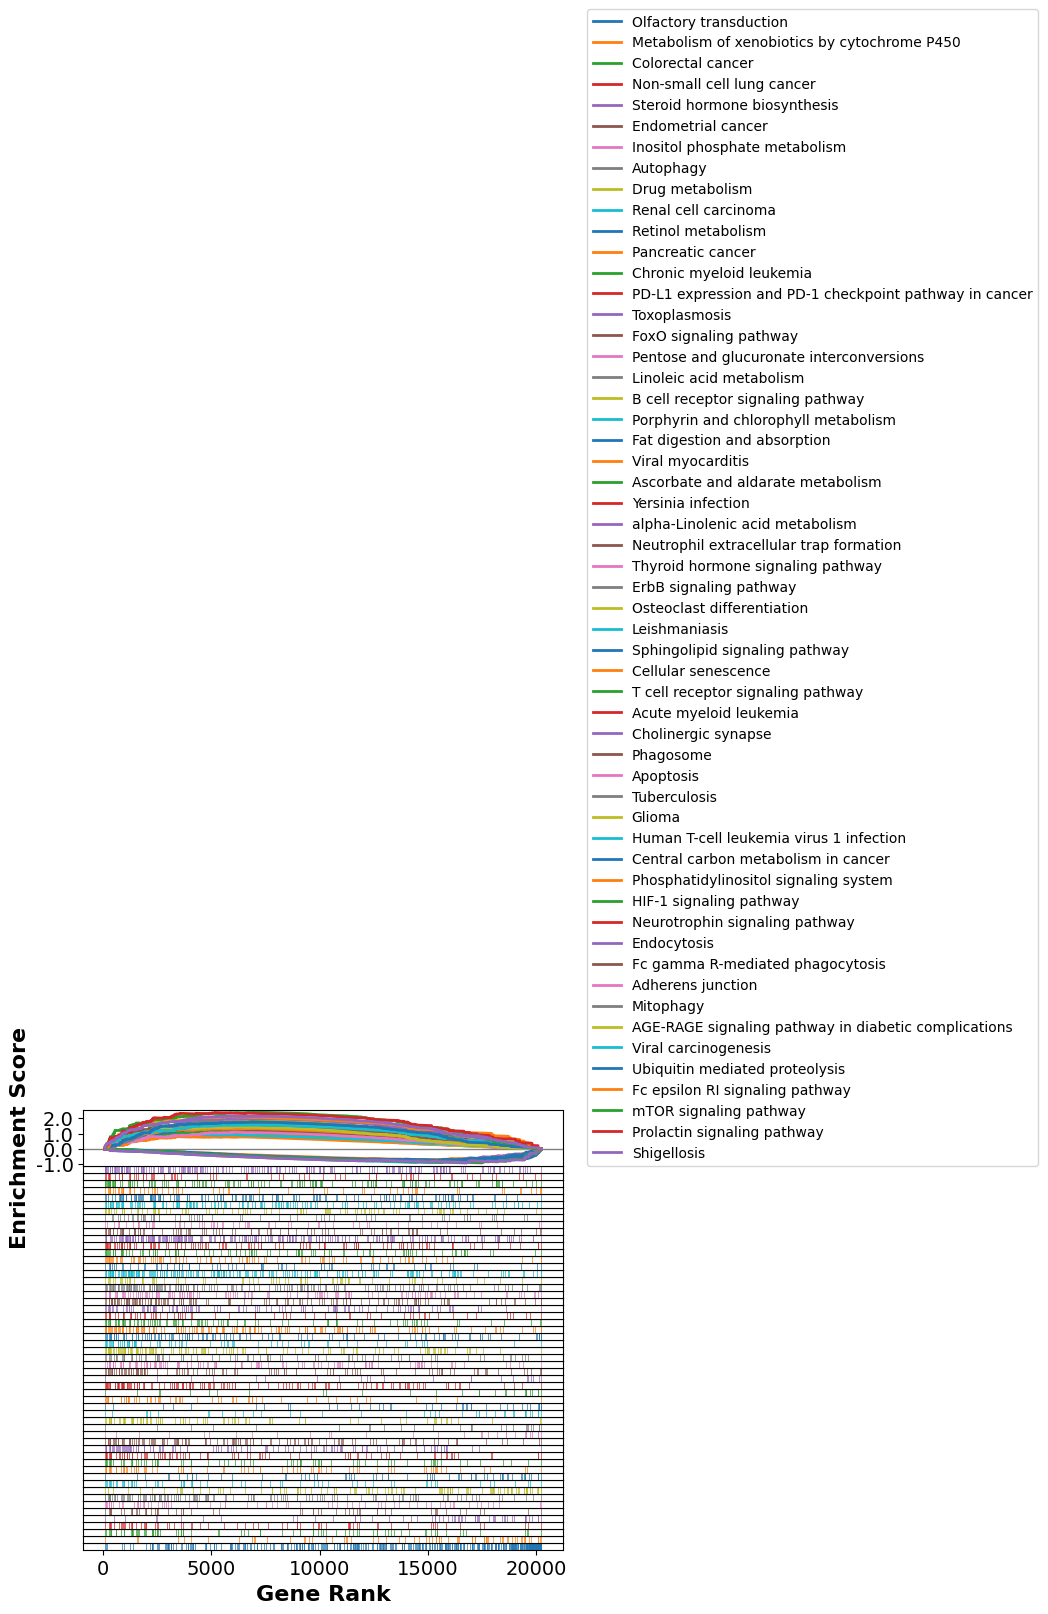

In [131]:
%reload_ext autoreload
%autoreload 2
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt

terms1 = terms.Term
axs = gs_res.plot(terms1, show_ranking=False, legend_kws={'loc': (1.05, 0)}, )
plt.savefig('plot_gsea_hmsc_husc.png', dpi=600, bbox_inches='tight')

In [121]:
gs_res.res2d

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,gsea,Olfactory transduction,-0.604081,-2.298108,0.0,0.00074,0.001,188/403,17.71%,OR5AU1;OR4P4;OR4N5;OR10T2;OR2T11;OR51F1;OR7D4;...
1,gsea,Porphyrin and chlorophyll metabolism,-0.655067,-2.073624,0.0,0.011838,0.025,22/40,18.41%,UGT2B28;UGT1A10;UGT2B11;UGT1A8;UGT2B15;UGT2B4;...
2,gsea,Toxoplasmosis,0.57736,1.985547,0.0,0.207112,0.094,56/110,21.74%,JAK2;IFNGR1;TLR4;NFKB1;PIK3CG;JAK1;IL10RA;CIIT...
3,gsea,Viral myocarditis,0.658388,1.933988,0.003984,0.186906,0.137,35/57,17.36%,HLA-E;HLA-DOA;HLA-DRA;HLA-DPA1;ITGAL;HLA-DMB;P...
4,gsea,Steroid hormone biosynthesis,-0.576563,-1.931582,0.002083,0.063135,0.137,26/58,18.00%,UGT2B28;UGT1A10;UGT2B11;HSD3B1;UGT1A8;UGT2B15;...
...,...,...,...,...,...,...,...,...,...,...
315,gsea,One carbon pool by folate,-0.192285,-0.535462,0.967433,0.983457,1.0,8/18,45.04%,SHMT2;ATIC;MTHFS;TYMS;MTHFD2;MTHFD1;SHMT1;ALDH1L2
316,gsea,"Neomycin, kanamycin and gentamicin biosynthesis",0.256445,0.51192,0.971944,0.991545,1.0,5/5,80.76%,HK3;HKDC1;GCK;HK1;HK2
317,gsea,Propanoate metabolism,0.172166,0.495732,0.971717,0.990212,1.0,19/33,43.60%,ECHDC1;DBT;BCKDHB;SUCLA2;ACSS3;LDHAL6A;ABAT;AC...
318,gsea,"Valine, leucine and isoleucine degradation",-0.149342,-0.440003,0.990196,0.994324,1.0,47/47,95.95%,HSD17B10;AGXT2;HMGCS2;AACS;PCCB;BCAT2;ACAT2;HM...


In [132]:
from gseapy import enrichment_map
# return two dataframe
nodes, edges = enrichment_map(gs_res.res2d)

In [139]:
nodes = nodes.drop([2])
nodes

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes,p_inv,Hits_ratio
node_idx,,,,,,,,,,,,
0,gsea,Steroid hormone biosynthesis,-0.608148,-1.963249,0.0,0.02966,0.084,38/58,23.42%,UGT2B28;UGT2B11;UGT1A10;UGT1A1;UGT1A8;UGT2B4;U...,1.527834,0.655172
1,gsea,Metabolism of xenobiotics by cytochrome P450,-0.613336,-2.005602,0.00202,0.024077,0.056,42/72,23.42%,UGT2B28;GSTA5;UGT2B11;UGT1A10;UGT1A1;UGT1A8;UG...,1.618404,0.583333


In [140]:
import networkx as nx
G = nx.from_pandas_edgelist(edges,
                            source='src_idx',
                            target='targ_idx',
                            edge_attr=['jaccard_coef', 'overlap_coef', 'overlap_genes'])

In [141]:
print(G)

Graph with 2 nodes and 1 edges


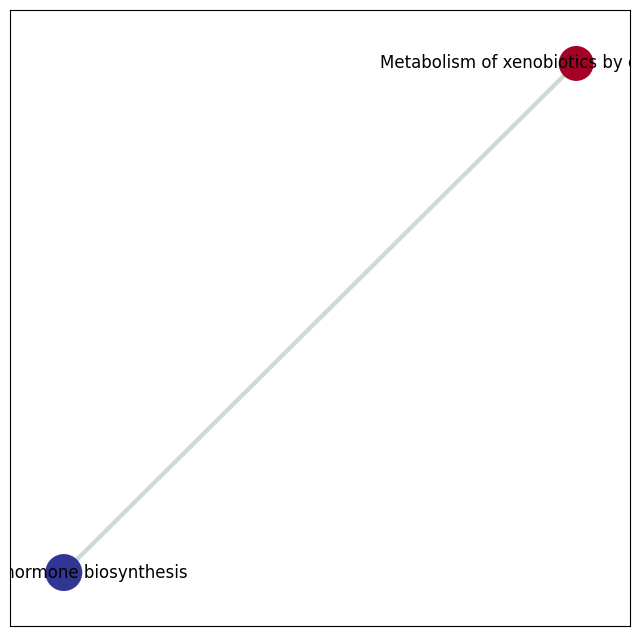

In [142]:
fig, ax = plt.subplots(figsize=(8, 8))

# init node cooridnates
pos=nx.layout.spiral_layout(G)
#node_size = nx.get_node_attributes()
# draw node
nx.draw_networkx_nodes(G,
                       pos=pos,
                       cmap=plt.cm.RdYlBu,
                       node_color=list(nodes.NES),
                       node_size=list(nodes.Hits_ratio *1000))
# draw node label
nx.draw_networkx_labels(G,
                        pos=pos,
                        labels=nodes.Term.to_dict())
# draw edge
edge_weight = nx.get_edge_attributes(G, 'jaccard_coef').values()
nx.draw_networkx_edges(G,
                       pos=pos,
                       width=list(map(lambda x: x*10, edge_weight)),
                       edge_color='#CDDBD4')
plt.savefig('network_hmsc_husc.png', dpi=600, bbox_inches='tight')

In [27]:
(gs_res.res2d).to_csv('stem_ipsc_husc.csv')

In [122]:
sorted_df = (gs_res.res2d).sort_values('NES', ascending=False)
sorted_df

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
2,gsea,cellular response to amino acid stimulus (GO:0...,0.738411,2.159384,0.0,0.080785,0.039,12/24,11.02%,RRAGC;CPEB4;RRAGD;MTOR;CPEB3;GLRA1;SESN3;CPEB1...
3,gsea,regulation of amyloid precursor protein catabo...,0.7545,2.055813,0.0,0.279382,0.196,5/12,3.85%,ROCK1;PICALM;ROCK2;RANBP9;PRNP
5,gsea,negative regulation of activated T cell prolif...,0.883365,2.019584,0.0,0.335258,0.311,8/11,9.86%,CD274;PRKAR1A;PDCD1LG2;LILRB4;PRNP;BTN2A2;CRTA...
6,gsea,cellular response to interleukin-6 (GO:0071354),0.69785,1.988131,0.0,0.395847,0.429,13/28,10.02%,JAK1;IL6R;CBL;IL6ST;NFKB1;PTPN11;JAK2;CTR9;STA...
8,gsea,response to amino acid (GO:0043200),0.659542,1.970171,0.0,0.414428,0.502,8/23,11.02%,RRAGC;CPEB4;RRAGD;MTOR;CPEB3;GLRA1;CPEB1;IPO5
...,...,...,...,...,...,...,...,...,...,...
9,gsea,detection of chemical stimulus involved in sen...,-0.628508,-1.959867,0.007547,0.238317,0.548,21/38,26.38%,TAS2R38;GNAT3;TAS2R60;CST4;TAS2R40;TAS2R8;RTP3...
7,gsea,sensory perception of bitter taste (GO:0050913),-0.623415,-1.982993,0.007407,0.21007,0.449,21/39,26.38%,TAS2R38;GNAT3;TAS2R60;CST4;TAS2R40;TAS2R8;RTP3...
4,gsea,detection of chemical stimulus involved in sen...,-0.626073,-2.029755,0.005597,0.132038,0.281,22/42,26.38%,TAS2R38;GNAT3;TAS2R60;CST4;TAS2R40;TAS2R8;RTP3...
1,gsea,sensory perception of chemical stimulus (GO:00...,-0.675134,-2.27486,0.0,0.001948,0.006,41/91,10.02%,OR8B8;OR5M11;OR5L2;OR8H1;OR52D1;OR9I1;OR8J3;OR...


In [100]:
from gseapy import gseaplot2
terms = gs_res.res2d.Term[1:5]
hits = [gs_res.results[t]['hits'] for t in terms]
runes = [gs_res.results[t]['RES'] for t in terms]
fig = gseaplot2(terms=terms, ress=runes, hits=hits,
              rank_metric=gs_res.ranking,
              legend_kws={'loc': (1.2, 0)}, # set the legend loc
              figsize=(4,5)) # rank_metric=pre_res.ranking

ImportError: cannot import name 'gseaplot2' from 'gseapy' (/home/nmrbox/0032/spriyadarshi/miniconda3/lib/python3.9/site-packages/gseapy/__init__.py)

In [123]:
top_10 = sorted_df.iloc[:20]
bottom_10 = sorted_df.iloc[-20:]
df = pd.concat([top_10, bottom_10], axis=0)
df

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
2,gsea,cellular response to amino acid stimulus (GO:0...,0.738411,2.159384,0.0,0.080785,0.039,12/24,11.02%,RRAGC;CPEB4;RRAGD;MTOR;CPEB3;GLRA1;SESN3;CPEB1...
3,gsea,regulation of amyloid precursor protein catabo...,0.7545,2.055813,0.0,0.279382,0.196,5/12,3.85%,ROCK1;PICALM;ROCK2;RANBP9;PRNP
5,gsea,negative regulation of activated T cell prolif...,0.883365,2.019584,0.0,0.335258,0.311,8/11,9.86%,CD274;PRKAR1A;PDCD1LG2;LILRB4;PRNP;BTN2A2;CRTA...
6,gsea,cellular response to interleukin-6 (GO:0071354),0.69785,1.988131,0.0,0.395847,0.429,13/28,10.02%,JAK1;IL6R;CBL;IL6ST;NFKB1;PTPN11;JAK2;CTR9;STA...
8,gsea,response to amino acid (GO:0043200),0.659542,1.970171,0.0,0.414428,0.502,8/23,11.02%,RRAGC;CPEB4;RRAGD;MTOR;CPEB3;GLRA1;CPEB1;IPO5
10,gsea,regulation of synaptic vesicle exocytosis (GO:...,0.688285,1.949012,0.002041,0.470124,0.591,11/18,19.05%,RAB3GAP1;RAP1A;FMR1;LRRK2;GSK3B;PREPL;RAB5A;RI...
13,gsea,cellular response to acid chemical (GO:0071229),0.655379,1.917318,0.0,0.621276,0.703,8/20,11.02%,RRAGC;CPEB4;RRAGD;MTOR;CPEB3;GLRA1;CPEB1;IPO5
14,gsea,Fc-gamma receptor signaling pathway involved i...,0.574656,1.917128,0.001927,0.544626,0.703,44/69,24.03%,MAPK1;ACTR2;NCKAP1L;CYFIP2;PIK3CA;PIK3CB;LYN;W...
15,gsea,Fc-gamma receptor signaling pathway (GO:0038094),0.577473,1.907007,0.003891,0.558016,0.735,45/70,24.03%,MAPK1;ACTR2;NCKAP1L;CYFIP2;PIK3CA;PIK3CB;LYN;W...
16,gsea,Fc receptor mediated stimulatory signaling pat...,0.574188,1.898104,0.003914,0.563745,0.767,46/72,24.03%,MAPK1;ACTR2;NCKAP1L;CYFIP2;PIK3CA;PIK3CB;LYN;W...


/tmp/ipykernel_52139/974956451.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['Term'], rotation=90, size=15)
/tmp/ipykernel_52139/974956451.py:24: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


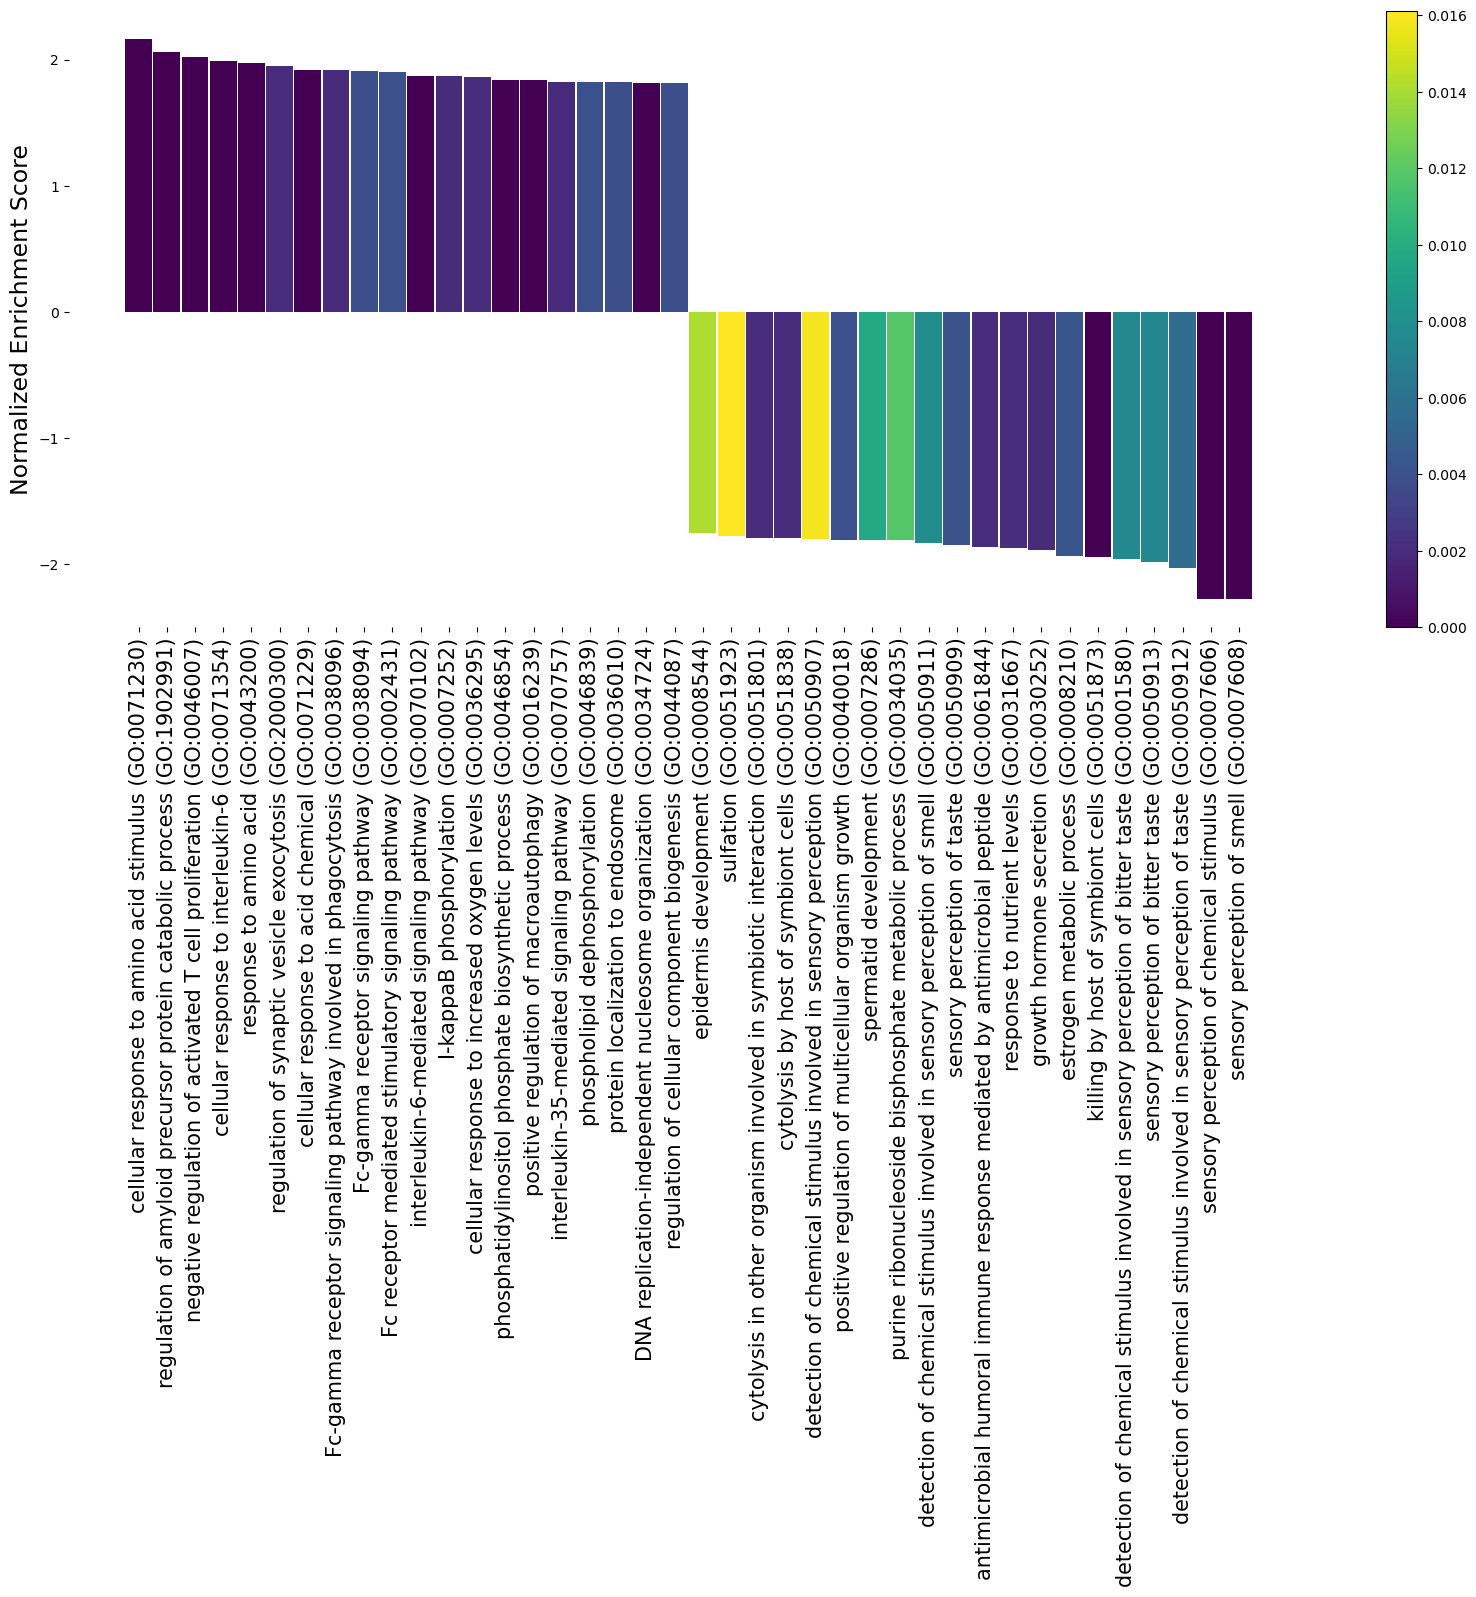

In [124]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
#fig, ax = plt.subplots()
#ax.bar(df['Term'], df['NES'], width=0.95)

#ax.set_xlabel("Pathways")
#ax.set_ylabel("Normalized Enrichment Score", size=13)

cmap = cm.get_cmap('viridis')
normalize = colors.Normalize(vmin=min(df['NOM p-val']), vmax=max(df['NOM p-val']))

fig, ax = plt.subplots(figsize=(20,8))
bar_colors = [cmap(normalize(val)) for val in df['NOM p-val']] # map colors based on data range
ax.bar(df['Term'], df['NES'], width=0.95, color=bar_colors)

#ax.set_title("Bar Plot")
ax.set_xticklabels(df['Term'], rotation=90, size=15)
#ax.set_yticklabels(size=15)

# Add color bar
sm = cm.ScalarMappable(cmap=cmap, norm=normalize)
sm.set_array([])
cbar = fig.colorbar(sm)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

#ax.set_xlabel("Pathways")
ax.set_ylabel("Normalized Enrichment Score", size=17)

#plt.show()
plt.savefig('kindlin2_husc_hmsc.png', dpi=600, bbox_inches='tight')

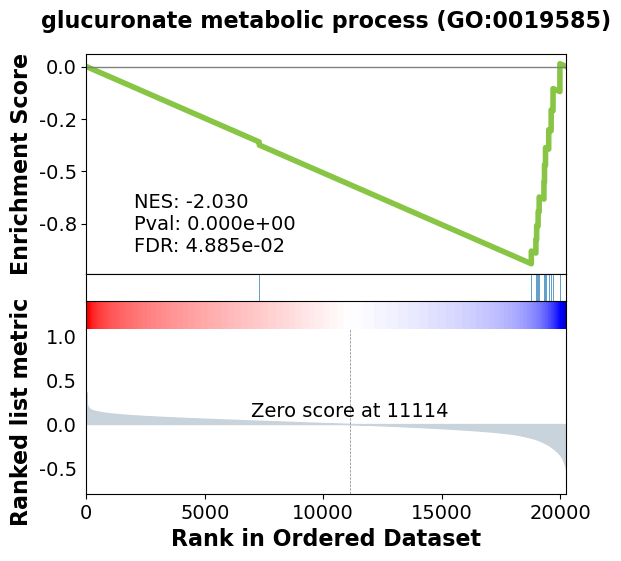

In [78]:
import matplotlib.pyplot as plt
from gseapy import gseaplot, heatmap

terms = gs_res.res2d.Term
i = 10
gseaplot(gs_res.ranking, term=terms[10], **gs_res.results[terms[10]])


In [64]:
import itertools
import seaborn as sns
genes = list(itertools.chain(*sorted_df.Lead_genes[:].str.split(";").tolist()))

cmap = sns.color_palette("twilight_r", as_cmap=True)

# Make sure that ``ofname`` is not None, if you want to save your figure to disk
ax = heatmap(df = gs_res.heatmat.loc[genes], z_score=0, title=terms[i], figsize=(14,4), cmap=cmap)

NameError: name 'heatmap' is not defined

In [ ]:
, ofname='hist_wiki_process.png'

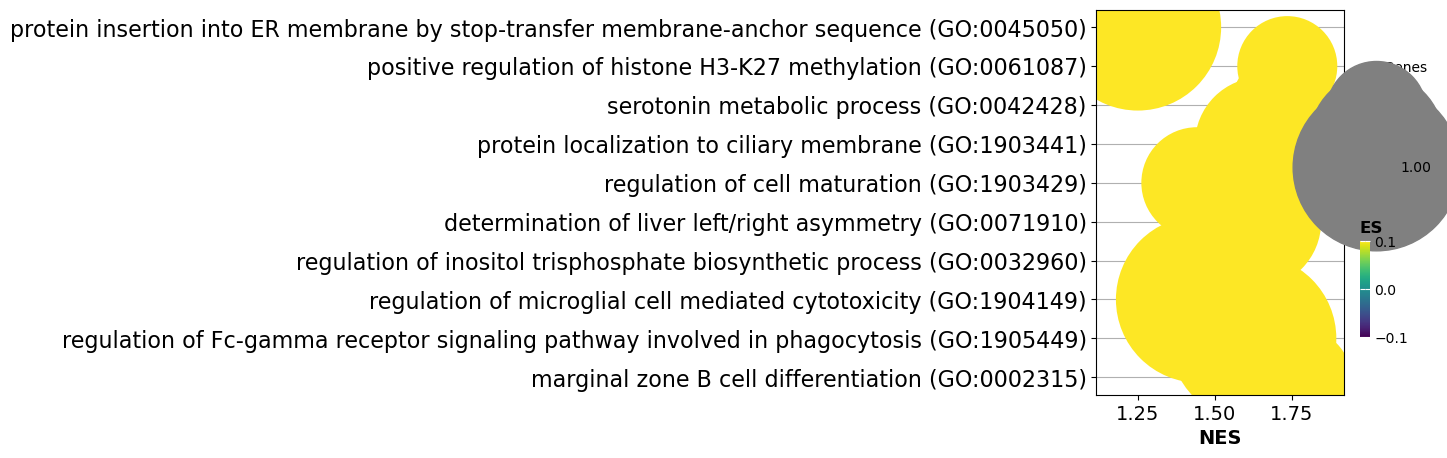

In [66]:
from gseapy import dotplot, ringplot
# to save your figure, make sure that ``ofname`` is not None
ax = dotplot(gs_res.res2d,
             column="ES",
             #title='KEGG_2021_Human',
             cmap=plt.cm.viridis,
             size=20,
             figsize=(4,5), cutoff=0.5)

In [2]:
human = gp.get_library_name(organism='Human')
human

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_2023',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'Descartes_Cell_Types_and_Tissue_2021',
 'Diabetes_Perturbations_GEO_2022',
 'DisG

In [27]:
gene_list = ['ASF1A', 'ASF1B', 'CHAF1A', 'CHAF1B', 'DAXX', 'DEK', 'HIRA', 'NASP', 'SSRP1', 'HJURP', 'SUPT16H', 'NAP1L1', 'NAP1L4', 'APLF', 'SUPT6H', 'NPM1', 'TAF1', 'NCL', 'RSF1', 'HIF1A', 'ANGPTL4', 'ACTR8', 'BAZ1A', 'RBBP4', 'RBBP7', 'MCM2', 'HSPA8', 'IPO4', 'SPTY2D1', 'ANP32E', 'UBR7', 'CHRAC1', 'UBN1', 'NPM2', 'NPM3', 'CABIN1', 'ATRX', 'TSPYL5', 'POLE3', 'POLE4', 'NAPSB', 'ANP32B', 'JDP2', 'FANCD2', 'DNAJC2', 'HIP1']

enr2 = gp.enrich(gene_list=gene_list,
                 gene_sets=['KEGG_2021_Human', 'WikiPathways_2019_Human', 'GO_Biological_Process_2021'],
                 background=None,
                 outdir=None,
                 verbose=True)

2023-04-22 08:08:30,639 [INFO] Run: KEGG_2021_Human 
2023-04-22 08:08:30,925 [INFO] Run: WikiPathways_2019_Human 
2023-04-22 08:08:31,217 [INFO] Run: GO_Biological_Process_2021 
2023-04-22 08:08:31,542 [INFO] Done.


In [28]:
enr2.results

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,DNA replication,3/36,0.000077,0.003083,0,0,42.116279,398.866433,POLE4;POLE3;MCM2
1,KEGG_2021_Human,Base excision repair,2/33,0.002611,0.052224,0,0,29.212610,173.755050,POLE4;POLE3
2,KEGG_2021_Human,Nucleotide excision repair,2/47,0.005238,0.069839,0,0,20.110101,105.614918,POLE4;POLE3
3,KEGG_2021_Human,Basal transcription factors,1/45,0.098534,0.432502,0,0,10.055556,23.302261,TAF1
4,KEGG_2021_Human,Cholesterol metabolism,1/50,0.108878,0.432502,0,0,9.027211,20.018118,ANGPTL4
...,...,...,...,...,...,...,...,...,...,...
552,GO_Biological_Process_2021,organelle assembly (GO:0070925),1/425,0.628111,0.633525,0,0,1.023585,0.476007,NPM1
553,GO_Biological_Process_2021,neutrophil degranulation (GO:0043312),1/481,0.674077,0.678426,0,0,0.901574,0.355590,HSPA8
554,GO_Biological_Process_2021,neutrophil activation involved in immune respo...,1/485,0.677139,0.680045,0,0,0.893939,0.348528,HSPA8
555,GO_Biological_Process_2021,neutrophil mediated immunity (GO:0002446),1/488,0.679417,0.680872,0,0,0.888296,0.343344,HSPA8
